## Module 4: 

## Team Members:
Angelina Leung
Cecelia Andreae

## Project Title:
Predicting trends in COVID-19 infections in Italy using SIR model.



## Project Goal:
This project seeks to use the SIR model to predict future COVID-19 infections in Italy.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
A study of seroprevalence (i.e., the proportion of the population with antibodies) reported wide regional variation in Italy: from about 0.35 % in Sicily to about 13.3 % in Lombardy. 
More broadly, cumulative confirmed cases by mid-2022 reached tens of millions: for example, one source reports ~25.6 million confirmed cases in Italy.
~13 million confirmed cases and ~155,000 deaths in the first two years of the pandemic in Italy

https://pmc.ncbi.nlm.nih.gov/articles/PMC7975916/?utm_source=chatgpt.com
https://coronavirus.jhu.edu/region/italy?utm_source=chatgpt.com


* Economic burden
1. Gross Domestic Product (GDP) contraction
    Italy’s real GDP declined by about 9 % in 2020 as a result of the pandemic and its containment measures. 
    The analysis by Italian authorities suggests that with no emergency fiscal measures the decline could have been ~13.4 % in 2020 (vs the ~8.9 % observed). 
    In the first quarter of 2020 alone, GDP fell ~5.3 % in Italy.
2. Investment and business impacts
    Without fiscal/ liquidity support, investment in Italy would have fallen ~21.7 % in 2020; with support the observed fall was ~9.2 %
    Sectors such as tourism, accommodation & food services were particularly hard hit — travel restrictions and lockdowns disproportionately impacted them. These sectors are a large portion of the Italian economy and the absence created a lack of jobs.
3. Fiscal / public finance burden
    The Italian government’s emergency measures (supporting households, firms, healthcare) mitigated the economic decline but at a cost — public debt and fiscal deficits increased significantly.
4. Recovery and structural effects
    The rebound began but full recovery was expected to take years. One source estimated that after a large drop (~17 % year-on-year contraction in Q2 2020) recovery to pre-pandemic levels might not occur before 2025.
https://pmc.ncbi.nlm.nih.gov/articles/PMC9161678/?utm_source=chatgpt.com
https://ec.europa.eu/economy_finance/forecasts/2020/summer/ecfin_forecast_summer_2020_it_en.pdf?utm_source=chatgpt.com

* Risk factors (genetic, lifestyle) & Societal determinants
1. Genetic Risk Factors
- ACE2 Receptor Variants
    SARS-CoV-2 enters cells through the ACE2 receptor.
    Differences in ACE2 expression or receptor-binding affinity may slightly modify susceptibility and severity.
- Autoimmune Conditions 
- HLA (Human Leukocyte Antigen) Gene Variants
    HLA genes regulate immune recognition of viruses.
    Some HLA types are linked to stronger immune responses, while others correlate with higher risk of severe COVID-19.
2. Lifestyle Risk Factors
    Smoking : damages lungs and weakens immune response, increases risk of severe disease, ICU admission and death 
    Obesity: increases inflammation, impairs breathing, and raises risk of thrombosis and severe disease
    Physical Inactivity: Sedentary lifestyle linked to higher hospitalization risk, regular activity improves immune and respiratory function 
    Poor Diet: low nutrient intake- weaker immune response 
    Alcohol use : chronic high alcohol consumption damages immunity and increase pneumonia risk 
    Sleep Deprivation and Stress : Reduces antiviral immune function, increases inflammation and susceptibility to infection
3. Societal Determinants
    Socioeconomic Status : lower income -> higher exposure due to closer quarters, less ability to social distance and work from home, higher rates of comorbid conditions, delayed access to treatment and testing 
    Crowded Housing : increase exposure risk 
    Employment: essential workers (healthcare, transport) limited remote work options, higher exposure
    Information Access and Health Literacy: misinformation and low health literacy reduced the uptake of masking, vaccination, early treatment, testing
    Support: ability to isolate depended on paid sick leave, financial support, availability of childcare


* Symptoms
1. Most Common Symptoms
    These appear in the majority of symptomatic cases:
    Fever or chills
    Cough (dry or productive)
    Sore throat
    Runny or congested nose
    Fatigue
    Headache
    Body aches / muscle pain

Loss of taste or smell (less common with newer variants but still possible)
* Diagnosis
- Labratory tests 
    - PCR Test (best) detects viral RNA 
    - Rapid Antigen Test - detects viral proteins in 10-20 minutes, symptomatic individuals
    - Antibody Test = IgM/IgG antibodies from past infection/vaccination
- Clinical Evaluation

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
- Caused by coronavirus SARS-CoV-2 enters through nose, mouth, eye 
- Binds to cells in upper respiratory tract
- Spike protein (S) on virus attaches to ACE2 receptor on cells (nasal/airway epithelial cells, lung alveolar cells, gastrointestinal tract)
- TMPRSS2, a human protease cuts (cleaves) the spike protein, Activates it, Allows the viral membrane to fuse with the cell membrane. After fusion, the virus releases its RNA genome into the host cell.
- Viral RNA read, proteins produced, new viral genomes and proteins assemble, new virions exit cell by exxocytosis which destroys or damages infected cells 
- Early Immune Response (Innate) can be sensed early and activate interferons but SARS-CoV-2 can suppress 
- Viral Spread beyond respiratory tract targeting lungs (pneumonia and ARDS) blood vessels (enodthelial inflamation, microclots) gastrointestinal (nausea) heart (myocarditis, arrhythmias), brain 
- Immune System can overreact and cause hyperinflammation (excess cytokines) major cause of severe cases and death
- long COVID can occur due to:
    Persistent inflammation
    Microclotting
    Viral remnants in tissues
    Autonomic nervous system dysfunction
    Immune dysregulation
    Mitochondrial dysfunction

## Dataset: 

The data set shows the cumulative daily confirmed cases of COVID-19 in Italy, from March to July of 2020. There are two columns: date and confirmed cases. This data set was subsetted from a larger study done by Johns Hopkins Center for Systems Science and Engineering (JHU CSSE). They gathered data from national/state health departments, from media reports, and from websites such as 1point3acres, Worldometers.info, BNO, and the COVID Tracking Project. A more comprehensive list of sources is available on the CSSE github.

- https://github.com/CSSEGISandData/COVID-19
- https://systems.jhu.edu/research/public-health/ncov/


## Data Analyis:

### Methods

We were given cumulative daily confirmed cases over 4 months. We first plotted the confirmed cases over time, then new cases over time. We then estimated the infectious population over time using the population of Italy at the time and infectious period. We approximated and graphed the susceptible population throughout this time period as well as the infected and recovered population. We used euler_sir to create a model for the infected population. Originally, it was with random values for the parameters, but these values were optimized using grid search. The fit of the model was judged using the SSE value. We created a new model using the same method but with only the first half of the dataset so we can predict the second half. Similarly, we assessed the fit using SSE. Finally, we used the RK4 method to create a model from the first half of the dataset to predict the second.


### Analysis


In [43]:
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Read in the csv file of cumulative cases.
data = pd.read_csv('/Users/Angel/OneDrive/Desktop/COVID/Module_4_COVID/Data/covid_italy_data_march_july_2020_cumulative.csv')
print(data.head())
data.columns = ['date', 'confirmed_cases']
data['date'] = pd.to_datetime(data['date'])

         date  confirmed_cases
0  2020-03-01             1694
1  2020-03-02             2036
2  2020-03-03             2502
3  2020-03-04             3089
4  2020-03-05             3858


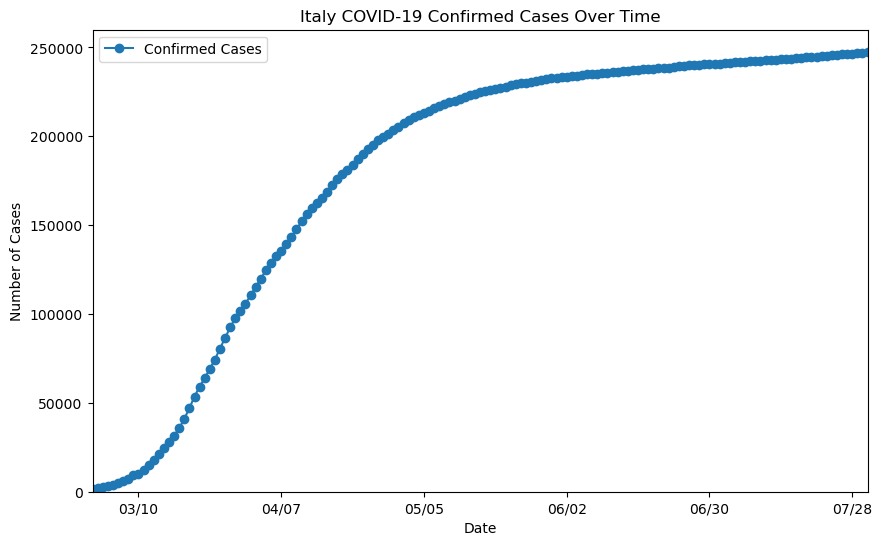

In [44]:
# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
# Plot of confirmed cases from Mar-Jul 2020
plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['confirmed_cases'],
         label='Confirmed Cases',
         marker="o")
plt.ylim(0, 260000)
plt.xlabel('Date')
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-07-31'))
# Format ticks as M/D (no leading zeros)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.ylabel('Number of Cases')
plt.title('Italy COVID-19 Confirmed Cases Over Time')
plt.legend()
plt.show()

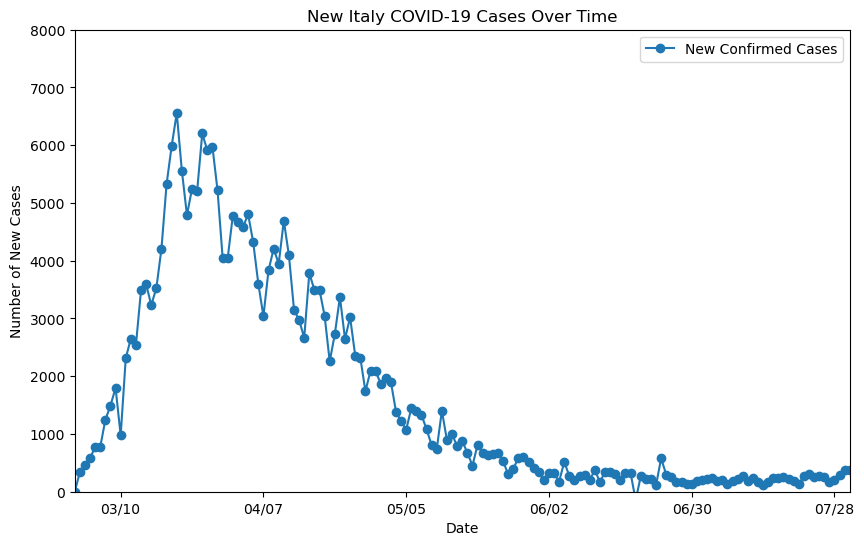

In [45]:
# I(t) plot
data['new_cases'] = data['confirmed_cases'].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(data['date'],
         data['new_cases'],
         label='New Confirmed Cases',
         marker="o")
plt.xlabel('Date')
plt.ylim(0, 8000)
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-07-31'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.ylabel('Number of New Cases')
plt.title('New Italy COVID-19 Cases Over Time')
plt.legend()
plt.show()

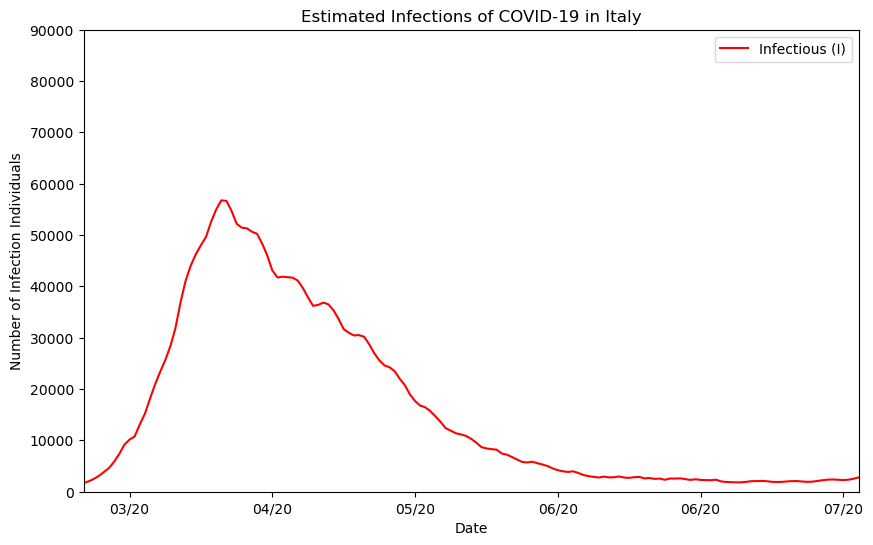

In [46]:
# 3. Plot S, I, R over time.
population = 59640000  # italy population approx as of 2020 from https://www.statista.com/statistics/263745/total-population-of-italy/
data_sir = convert_cumulative_to_SIR(
    data,
    date_col='date',
    cumulative_col='confirmed_cases',
    population=population,
    infectious_period=10, # https://www.cdc.gov/yellow-book/hcp/travel-associated-infections-diseases/covid-19.html
    new_case_col='new_cases',
    I_col='I_est',
    R_col='R_est',
    S_col='S_est')

# Infectious population over time
plt.figure(figsize=(10, 6))

plt.plot(data_sir['date'],
         data_sir['I_est'],
         label='Infectious (I)',
         color='red')

plt.xlabel('Date')
plt.xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-07-31'))
plt.ylim(0, 90000)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.ylabel('Number of Infection Individuals')
plt.title('Estimated Infections of COVID-19 in Italy')
plt.legend()
plt.show()

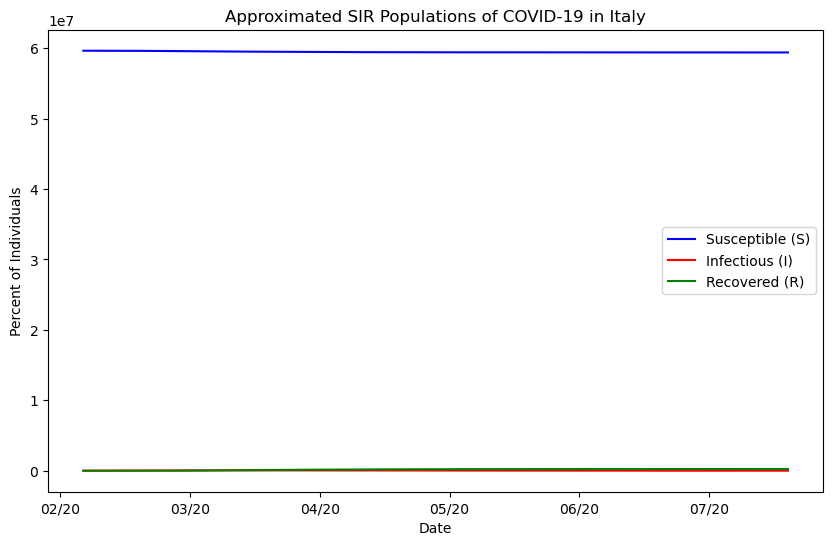

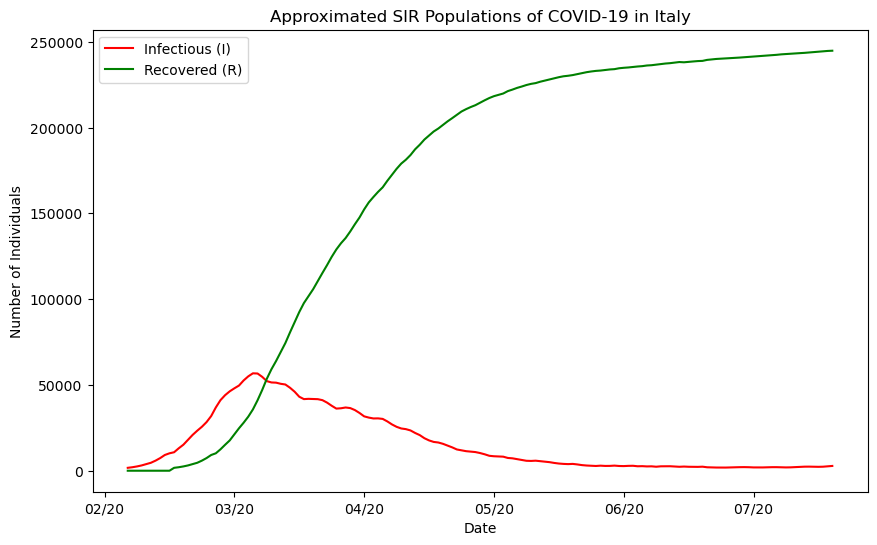

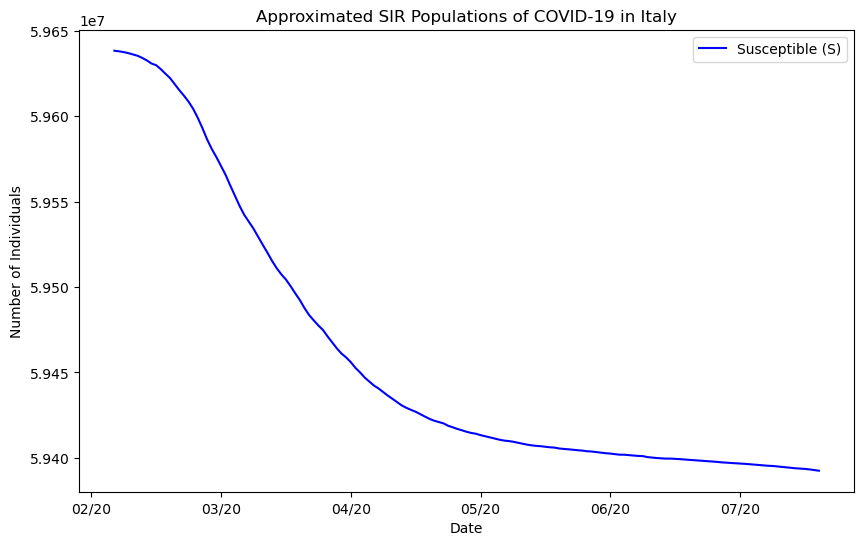

In [47]:
# SIR Models (1st plot with SIR, 2nd with just IR, 3rd with just S to better show trends)
# SIR estimates over time, can't see much because susceptible pop so high compared to infected and recovered
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'],
         data_sir['S_est'],
         label='Susceptible (S)',
         color='blue')
plt.plot(data_sir['date'],
         data_sir['I_est'],
         label='Infectious (I)',
         color='red')
plt.plot(data_sir['date'],
         data_sir['R_est'],
         label='Recovered (R)',
         color='green')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.ylabel('Percent of Individuals')
plt.title('Approximated SIR Populations of COVID-19 in Italy')
plt.legend()
plt.show()

# Just IR
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'],
         data_sir['I_est'],
         label='Infectious (I)',
         color='red')
plt.plot(data_sir['date'],
         data_sir['R_est'],
         label='Recovered (R)',
         color='green')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.ylabel('Number of Individuals')
plt.title('Approximated SIR Populations of COVID-19 in Italy')
plt.legend()
plt.show()

# Just S
plt.figure(figsize=(10, 6))
plt.plot(data_sir['date'],
         data_sir['S_est'],
         label='Susceptible (S)',
         color='blue')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
plt.ylabel('Number of Individuals')
plt.title('Approximated SIR Populations of COVID-19 in Italy')
plt.legend()
plt.show()

In [48]:
from scipy.optimize import least_squares
import numpy as np


def euler_sir(beta, gamma, S0, I0, R0, t, N): # had to copy and paste this in because my computer saved old version of main_functions.py
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)
    S[0], I[0], R[0] = S0, I0, R0
    
    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]
        dS = -beta * S[n] * I[n] / N
        dI = beta * S[n] * I[n] / N - gamma * I[n]
        dR = gamma * I[n]
        S[n + 1] = S[n] + dt * dS
        I[n + 1] = I[n] + dt * dI
        R[n + 1] = R[n] + dt * dR

    return S, I, R

# initial conditions from first row
S0 = data_sir['S_est'].iloc[0]
I0 = data_sir['I_est'].iloc[0]
R0 = data_sir['R_est'].iloc[0]
N = population

# time array: one entry per day (0, 1, 2, ..., n_days-1)
t_data = np.arange(len(data_sir))

# observed infected data (what we want to fit)
I_data = data_sir['I_est'].values

In [49]:
def residuals(params):
    beta, gamma = params
    
    # use your Euler integrator
    S_model, I_model, R_model = euler_sir(beta, gamma, S0, I0, R0, t_data, N)
    
    # residuals = model - data
    return I_model - I_data

beta0 = .3
gamma0 = .1

res = least_squares(
    residuals,
    x0=[beta0, gamma0],
    bounds=(0, np.inf)  # beta, gamma ≥ 0
)

beta_fit, gamma_fit = res.x

print("Fitted beta:", beta_fit)
print("Fitted gamma:", gamma_fit)
print("R0 (basic reproduction number):", beta_fit / gamma_fit)

Fitted beta: 3.228542813208824
Fitted gamma: 3.0931592989052232
R0 (basic reproduction number): 1.0437686847720768


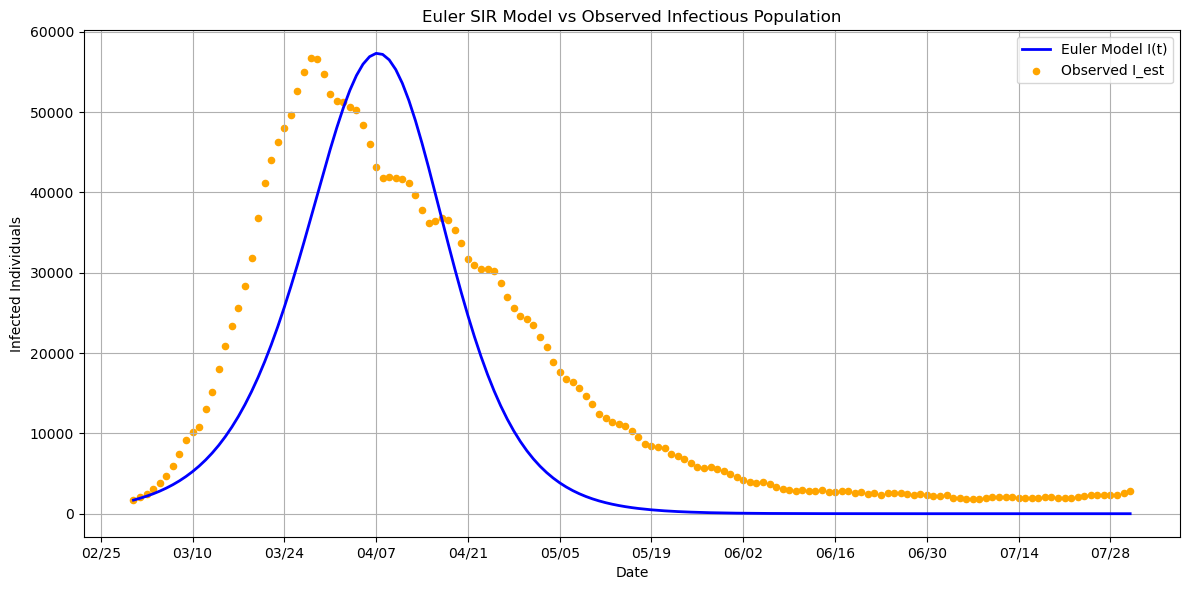

In [50]:
S_fit, I_fit, R_fit = euler_sir(
    beta_fit,
    gamma_fit,
    S0,
    I0,
    R0,
    t_data,
    N
)

# 2. Extract observed data for comparison
I_obs = data_sir['I_est'].values
dates = data_sir['date']

# 3. Plot comparison
plt.figure(figsize=(12, 6))

plt.plot(dates, I_fit, label='Euler Model I(t)', linewidth=2, color='blue')
plt.scatter(dates, I_obs, label='Observed I_est', s=20, color='orange')

plt.xlabel("Date")
plt.ylabel("Infected Individuals")
plt.title("Euler SIR Model vs Observed Infectious Population")
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.tight_layout()

plt.show()

In [51]:
#SUM OF SQUARED ERRORS (SSE)
SSE = np.sum((I_fit - I_data)**2)
print("SSE =", SSE)


SSE = 13121393365.323029


In [52]:
# use scipy.optimize.minimize to systematically select gamma and beta to minimize SSE

def SSE_objective(params):
    beta, gamma = params
    
    # simulate using your Euler SIR model
    S_model, I_model, R_model = euler_sir(
        beta, gamma, S0, I0, R0, t_data, N
    )
    
    # compute SSE between model and observed I values
    return np.sum((I_model - I_data)**2)

from scipy.optimize import minimize

# initial guesses
initial_guess = [0.3, 0.1]

# bounds for beta and gamma
bounds = [(0, 1), (0, 1)]  # beta ∈ [0,1], gamma ∈ [0,1]

result = minimize(
    SSE_objective,
    x0=initial_guess,
    method='L-BFGS-B',
    bounds=bounds
)

beta_opt, gamma_opt = result.x

print("Optimal beta:", beta_opt)
print("Optimal gamma:", gamma_opt)
print("R0 =", beta_opt / gamma_opt)
print("Final SSE:", result.fun)


Optimal beta: 1.0
Optimal gamma: 0.984302887945679
R0 = 1.01594744081985
Final SSE: 71892079303.5515


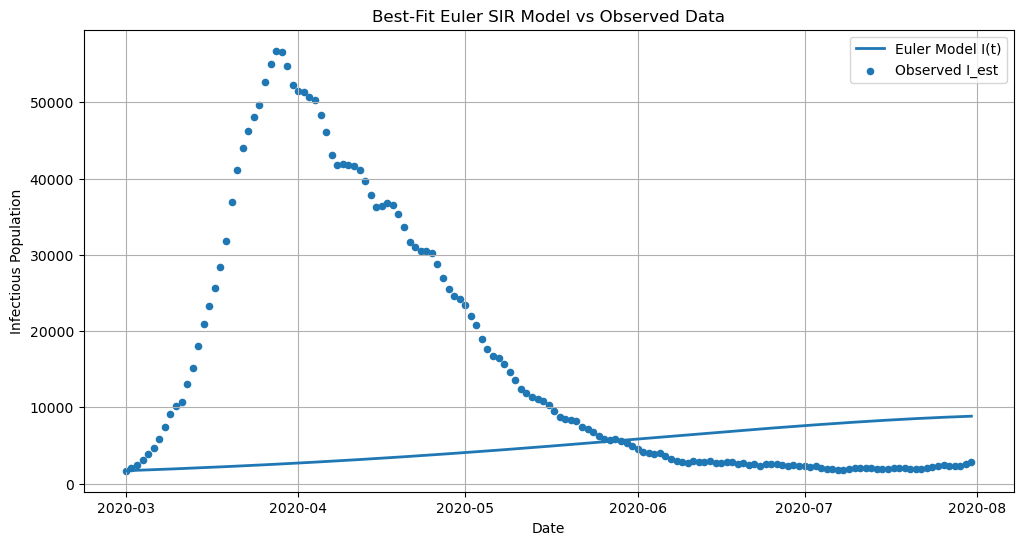

In [53]:
#PLOTTING THE BEST-FIT MODEL AGAINST DATA

S_fit, I_fit, R_fit = euler_sir(
    beta_opt, gamma_opt,
    S0, I0, R0,
    t_data, N
)

plt.figure(figsize=(12,6))
plt.plot(data_sir['date'], I_fit, label="Euler Model I(t)", linewidth=2)
plt.scatter(data_sir['date'], I_data, s=20, label="Observed I_est")
plt.xlabel("Date")
plt.ylabel("Infectious Population")
plt.title("Best-Fit Euler SIR Model vs Observed Data")
plt.legend()
plt.grid(True)
plt.show()

SSE was lower but model was worse due to noise so retried using a grid search instead of scipy.optimize.minimize

In [54]:
def SSE(beta, gamma):
    S_model, I_model, R_model = euler_sir(
        beta, gamma, S0, I0, R0, t_data, N
    )
    return np.sum((I_model - I_data)**2)

beta_values  = np.linspace(.5, 4, 50)   # 50 values between 0.5 and 4
gamma_values = np.linspace(.5, 4, 50)   # 50 values between 0.5 and 4
best_beta = None
best_gamma = None
best_sse = np.inf

for beta in beta_values:
    for gamma in gamma_values:
        
        sse = SSE(beta, gamma)

        if sse < best_sse:
            best_sse = sse
            best_beta = beta
            best_gamma = gamma

print("Best beta:", best_beta)
print("Best gamma:", best_gamma)
print("Best SSE:", best_sse)
print("R0:", best_beta / best_gamma)


C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\3198907892.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dS = -beta * S[n] * I[n] / N
C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\3198907892.py:14: RuntimeWarning: overflow encountered in scalar multiply
  dI = beta * S[n] * I[n] / N - gamma * I[n]
C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\3198907892.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  dI = beta * S[n] * I[n] / N - gamma * I[n]
C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\422588388.py:5: RuntimeWarning: overflow encountered in square
  return np.sum((I_model - I_data)**2)


Best beta: 3.3571428571428568
Best gamma: 3.214285714285714
Best SSE: 13387617803.717834
R0: 1.0444444444444445


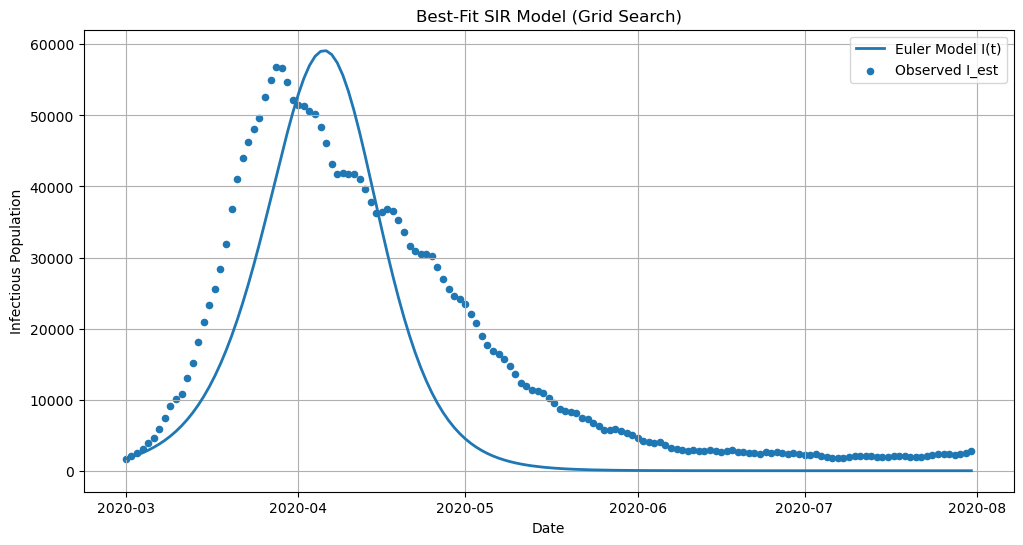

In [55]:
S_fit, I_fit, R_fit = euler_sir(
    best_beta, best_gamma,
    S0, I0, R0,
    t_data, N
)

plt.figure(figsize=(12,6))
plt.plot(data_sir['date'], I_fit, label="Euler Model I(t)", linewidth=2)
plt.scatter(data_sir['date'], I_data, s=20, label="Observed I_est")
plt.xlabel("Date")
plt.ylabel("Infectious Population")
plt.title("Best-Fit SIR Model (Grid Search)")
plt.legend()
plt.grid(True)
plt.show()


### Predicting "the future"

The next section is splitting the dataset, training a SIR model on the first part, and comparing SIR model to actual infections of second half of the data.

Train length: 76 Test length: 77


C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\3198907892.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dS = -beta * S[n] * I[n] / N
C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\3198907892.py:14: RuntimeWarning: overflow encountered in scalar multiply
  dI = beta * S[n] * I[n] / N - gamma * I[n]
C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\3198907892.py:14: RuntimeWarning: invalid value encountered in scalar subtract
  dI = beta * S[n] * I[n] / N - gamma * I[n]
C:\Users\Angel\AppData\Local\Temp\ipykernel_13952\1959372650.py:37: RuntimeWarning: overflow encountered in square
  return np.sum((I_model - I_train)**2)


Best beta (train): 3.91025641025641
Best gamma (train): 3.730769230769231
Best train SSE: 19299720489.787506
R0 (train) = 1.0481099656357389

Train SSE (from full sim): 19299720489.787506
Test SSE: 1268537509.2855816


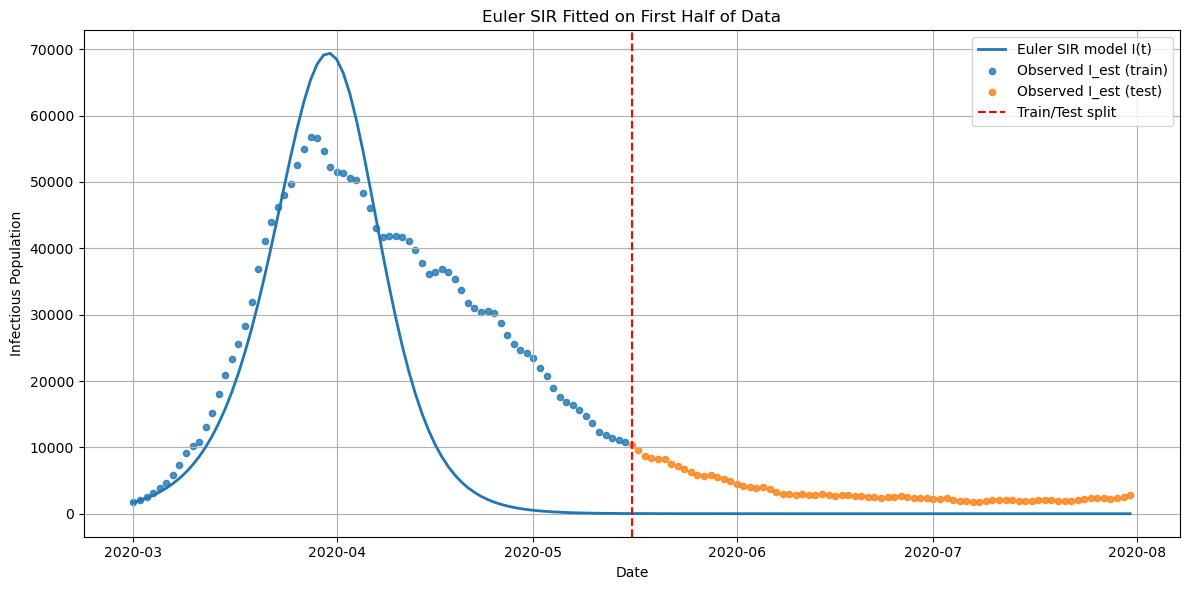

In [56]:
import numpy as np
import matplotlib.pyplot as plt

I_data = data_sir['I_est'].values
dates = data_sir['date'].values
N = population

# initial conditions from first day
S0 = data_sir['S_est'].iloc[0]
I0 = data_sir['I_est'].iloc[0]
R0 = data_sir['R_est'].iloc[0]

n = len(I_data)
split_idx = n // 2   # first half = train, second half = test

# time arrays
t_full = np.arange(n)                # for full simulation
t_train = np.arange(split_idx)       # for training part only

# train/test observed data
I_train = I_data[:split_idx]
I_test  = I_data[split_idx:]
dates_train = dates[:split_idx]
dates_test  = dates[split_idx:]

print("Train length:", len(I_train), "Test length:", len(I_test))


# SSE on first half of dataset

def SSE_train(beta, gamma):
    S_model, I_model, R_model = euler_sir(
        beta, gamma,
        S0, I0, R0,
        t_train, N
    )
    return np.sum((I_model - I_train)**2)


# grid search to optimize parameters for first half of dataset

beta_values  = np.linspace(0.5, 4, 40)   # adjusted to previous nums 
gamma_values = np.linspace(0.5, 4, 40)

best_beta = None
best_gamma = None
best_sse_train = np.inf

for beta in beta_values:
    for gamma in gamma_values:
        sse = SSE_train(beta, gamma)
        if sse < best_sse_train:
            best_sse_train = sse
            best_beta = beta
            best_gamma = gamma

print("Best beta (train):", best_beta)
print("Best gamma (train):", best_gamma)
print("Best train SSE:", best_sse_train)
print("R0 (train) =", best_beta / best_gamma)


# model with parameters we just got

S_fit_full, I_fit_full, R_fit_full = euler_sir(
    best_beta, best_gamma,
    S0, I0, R0,
    t_full, N
)

# compute SSE on train and test portions
SSE_train_final = np.sum((I_fit_full[:split_idx] - I_train)**2)
SSE_test = np.sum((I_fit_full[split_idx:] - I_test)**2)

print("\nTrain SSE (from full sim):", SSE_train_final)
print("Test SSE:", SSE_test)

# plot trained model to compare with test second half data

plt.figure(figsize=(12, 6))

# model over full period
plt.plot(dates, I_fit_full, label='Euler SIR model I(t)', linewidth=2)

# data points
plt.scatter(dates_train, I_train, s=20, label='Observed I_est (train)', alpha=0.8)
plt.scatter(dates_test,  I_test,  s=20, label='Observed I_est (test)',  alpha=0.8)

# vertical line marking split
plt.axvline(dates[split_idx], color='red', linestyle='--', label='Train/Test split')

plt.xlabel("Date")
plt.ylabel("Infectious Population")
plt.title("Euler SIR Fitted on First Half of Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# Compute SSE on second half of data only
I_test = I_data[split_idx:]             # observed test data
I_fit_test = I_fit_full[split_idx:]     # model predictions for test period

SSE_test_only = np.sum((I_fit_test - I_test)**2)

print("SSE (second half only):", SSE_test_only)

SSE (second half only): 1268537509.2855816


Error of Euler method: (SSE second half only, trained on first half): 1268537509.2855816

Comparable to error from training and testing on full data: 13387617803.717834

### Full vs 1st half vs 2nd half

Full:
- Beta: ~3.36
- Gamma: ~3.21
- SSE: ~1.34e10

First Half:
- Beta: ~3.91
- Gamma: ~3.73
- SSE: ~1.92e10

The new beta and gamma for the first half of data is somewhat close to the full dataset parameters. The first half values are both larger, and both have beta as the greater value. The fit for the first half model is better in that when the peak occurs is more aligned with the actual data. However, the number of infectious people at the peak in the model was overshot while the full data model peak was closer to the actual value. If basing fit on SSE, the first half model is a worse fit than the full data model.

Second Half:
- SSE: ~1.27e9

### How Midpoint Method Can Lower Error

The midpoint method uses half step sizes in the ODE approximation. Smaller step sizes, in general, make models less conservative and lower numerical error.

### Implementing RK4 Method

Train length: 76 Test length: 77
Best beta (train, RK45): 3.214285714285714
Best gamma (train, RK45): 3.071428571428571
Best train SSE (RK45): 10282174966.534742
R0 (train, RK45) = 1.0465116279069768

SSE (second half only, RK45) = 1192495260.9769015


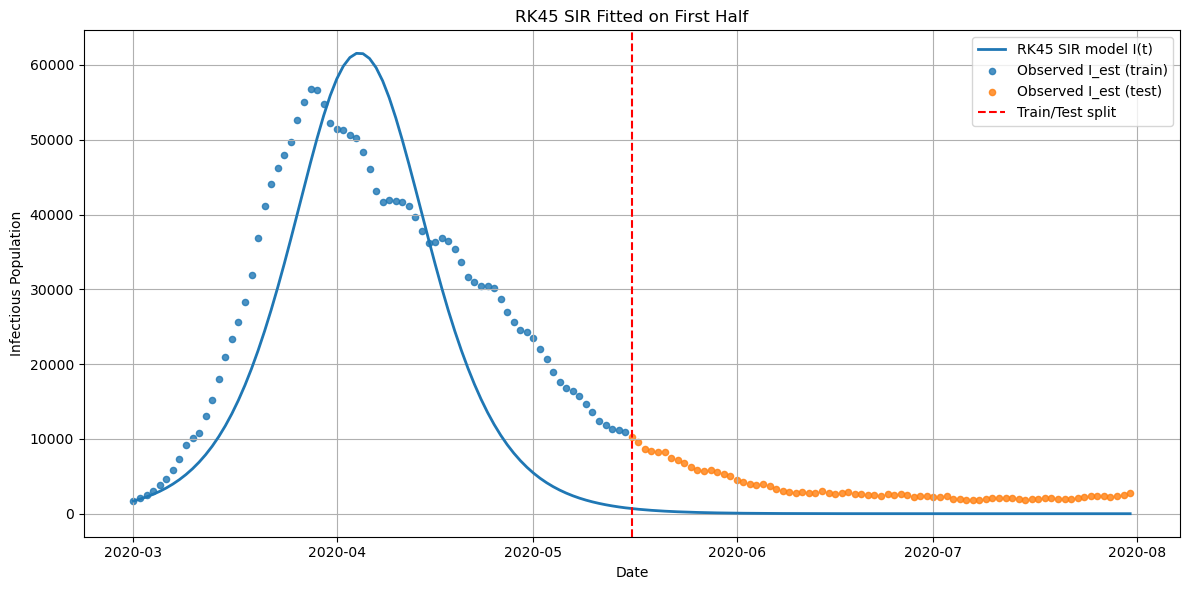

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

I_data = data_sir['I_est'].values
dates = data_sir['date'].values
N = population

# initial conditions from first day
S0 = data_sir['S_est'].iloc[0]
I0 = data_sir['I_est'].iloc[0]
R0 = data_sir['R_est'].iloc[0]

n = len(I_data)
split_idx = n // 2   # first half = train, second half = test

# time arrays (days since start)
t_full = np.arange(n)                 # 0, ..., n-1
t_train = np.arange(split_idx)        # 0, ..., split_idx-1

# observed data split
I_train = I_data[:split_idx]
I_test  = I_data[split_idx:]
dates_train = dates[:split_idx]
dates_test  = dates[split_idx:]

print("Train length:", len(I_train), "Test length:", len(I_test))


# setting up SIR model using RK45 method

def sir_rhs(t, y, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

def simulate_sir_rk45(beta, gamma, t_eval, S0, I0, R0, N):
    """
    Simulate SIR using solve_ivp with RK45, returning S, I, R evaluated at t_eval.
    """
    sol = solve_ivp(
        fun=lambda t, y: sir_rhs(t, y, beta, gamma, N),
        t_span=(t_eval[0], t_eval[-1]),
        y0=[S0, I0, R0],
        t_eval=t_eval,
        method="RK45"
    )
    S, I, R = sol.y  # each is array of len(t_eval)
    return S, I, R


# first half of data training

def SSE_train_rk45(beta, gamma):
    S_model, I_model, R_model = simulate_sir_rk45(
        beta, gamma,
        t_train, S0, I0, R0, N
    )
    return np.sum((I_model - I_train)**2)


# optimizing parameters using grid search

beta_values  = np.linspace(0.5, 4, 50)   # adjust resolution / range as needed
gamma_values = np.linspace(0.5, 4,50)

best_beta = None
best_gamma = None
best_sse_train = np.inf

for beta in beta_values:
    for gamma in gamma_values:
        sse = SSE_train_rk45(beta, gamma)
        if sse < best_sse_train:
            best_sse_train = sse
            best_beta = beta
            best_gamma = gamma

print("Best beta (train, RK45):", best_beta)
print("Best gamma (train, RK45):", best_gamma)
print("Best train SSE (RK45):", best_sse_train)
print("R0 (train, RK45) =", best_beta / best_gamma)


# create model using fitted parameters

S_fit_full, I_fit_full, R_fit_full = simulate_sir_rk45(
    best_beta, best_gamma,
    t_full, S0, I0, R0, N
)

# SSE on second half of data only

I_fit_test = I_fit_full[split_idx:]
SSE_test_only = np.sum((I_fit_test - I_test)**2)

print("\nSSE (second half only, RK45) =", SSE_test_only)


# plot

plt.figure(figsize=(12, 6))

# model over full period
plt.plot(dates, I_fit_full, label='RK45 SIR model I(t)', linewidth=2)

# data points
plt.scatter(dates_train, I_train, s=20, label='Observed I_est (train)', alpha=0.8)
plt.scatter(dates_test,  I_test,  s=20, label='Observed I_est (test)',  alpha=0.8)

# vertical split line
plt.axvline(dates[split_idx], color='red', linestyle='--', label='Train/Test split')

plt.xlabel("Date")
plt.ylabel("Infectious Population")
plt.title("RK45 SIR Fitted on First Half")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Error of Euler method: (SSE second half only, trained on first half): 12.6e8

Comparable to error from training and testing on full data: 13.4e9

SSE (second half only, RK45) = 11.9e8

### Improving model fit by factoring in death

In [59]:
# factoring deaths into model

def euler_sird(beta, gamma, alpha, mu, S0, I0, R0, t, N):
    S = np.empty(len(t), float)
    I = np.empty(len(t), float)
    R = np.empty(len(t), float)

    S[0], I[0], R[0] = S0, I0, R0

    for n in range(len(t) - 1):
        dt = t[n + 1] - t[n]

        dS = -beta * S[n] * I[n] / N - mu * S[n]
        dI = beta * S[n] * I[n] / N - gamma * I[n] - (mu + alpha) * I[n]
        dR = gamma * I[n] - mu * R[n]

        S[n + 1] = S[n] + dt * dS
        I[n + 1] = I[n] + dt * dI
        R[n + 1] = R[n] + dt * dR

    return S, I, R

In [60]:
mu = 0.002  # background death rate https://www.statista.com/statistics/1119146/covid-19-infection-and-death-rates-per-100-000-inhabitants-italy/?srsltid=AfmBOooGBpnuMzqly_tje-0DyAmpTDcVxGWQ3U6ApdDm6JzZThgE4Qre#:~:text=State%20of%20Health-,COVID%2D19%20infection%20and%20death%20rates%20per%20100%2C000%20population,Italy%20as%20of%20June%202020&text=As%20of%20July%208%2C%202020,hit%20countries%20by%20the%20pandemic.
def residuals_death(params):
    beta, gamma, alpha = params

    S_model, I_model, R_model = euler_sird(
        beta, gamma, alpha, mu,
        S0, I0, R0, t_data, N
    )
    return I_model - I_data

In [61]:
# fitting parameters

res_death = least_squares(
    residuals_death,
    x0=[beta_fit, gamma_fit, 0.05],   
    bounds=(0, np.inf)
)

beta_d, gamma_d, alpha_d = res_death.x


In [62]:
# death model
S_d, I_d, R_d = euler_sird(
    beta_d, gamma_d, alpha_d, mu,
    S0, I0, R0,
    t_data, N
)

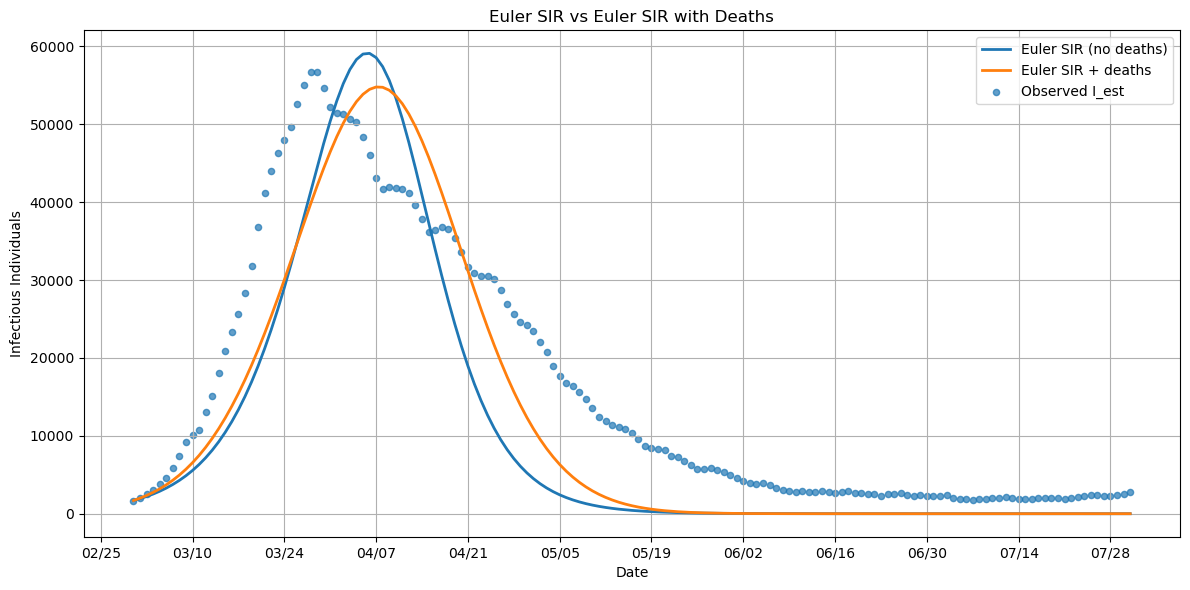

In [63]:
# plotting original Euler SIR vs SIR including death rates
plt.figure(figsize=(12, 6))

plt.plot(
    dates, I_fit,
    label='Euler SIR (no deaths)',
    linewidth=2
)

plt.plot(
    dates, I_d,
    label='Euler SIR + deaths',
    linewidth=2
)

plt.scatter(
    dates, I_obs,
    label='Observed I_est',
    s=20, alpha=0.7
)

plt.xlabel("Date")
plt.ylabel("Infectious Individuals")
plt.title("Euler SIR vs Euler SIR with Deaths")
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
plt.tight_layout()
plt.show()


In [64]:
#SUM OF SQUARED ERRORS (SSE)
sir_SSE = round(np.sum((I_fit - I_data)**2)*(10**-10), 2)
print("Original Euler SIR SSE =", sir_SSE, "e10")

sird_SSE = round(np.sum((I_d - I_data)**2)*(10**-9), 2)
print("Death Model SSE =", sird_SSE, "e9")

Original Euler SIR SSE = 1.34 e10
Death Model SSE = 8.87 e9


SEIRD fit (full data)
beta_fit = 2.214851546010021
gamma_fit = 2.0
mu (fixed) = 0.002
sigma (fixed) = 0.2 (incubation_days=5.0)
SSE = 79297956068.24945


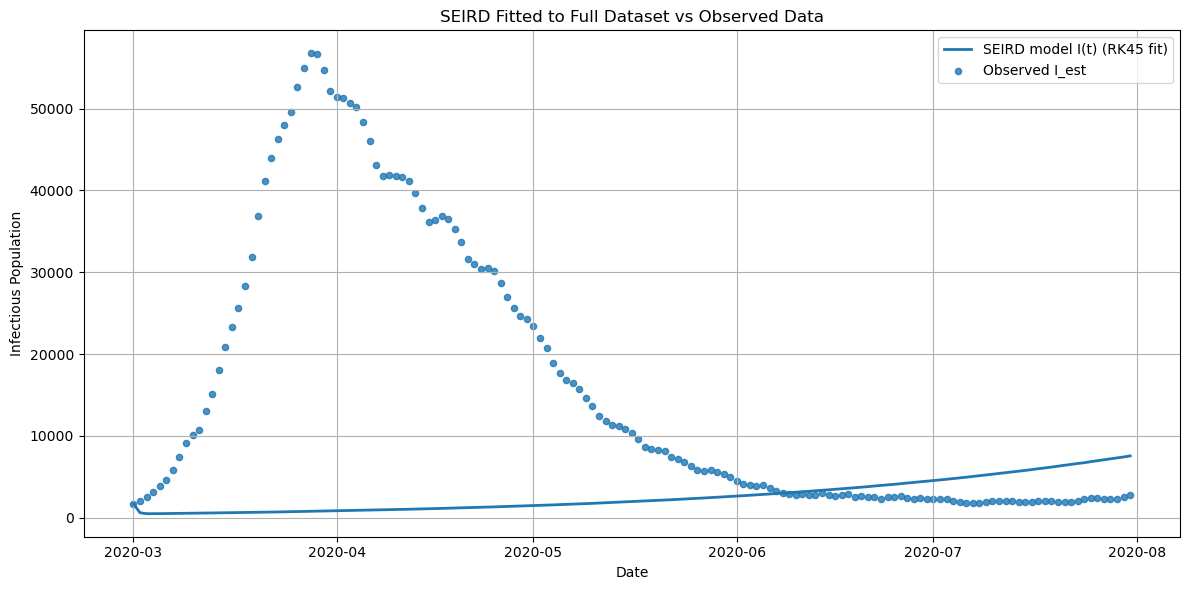

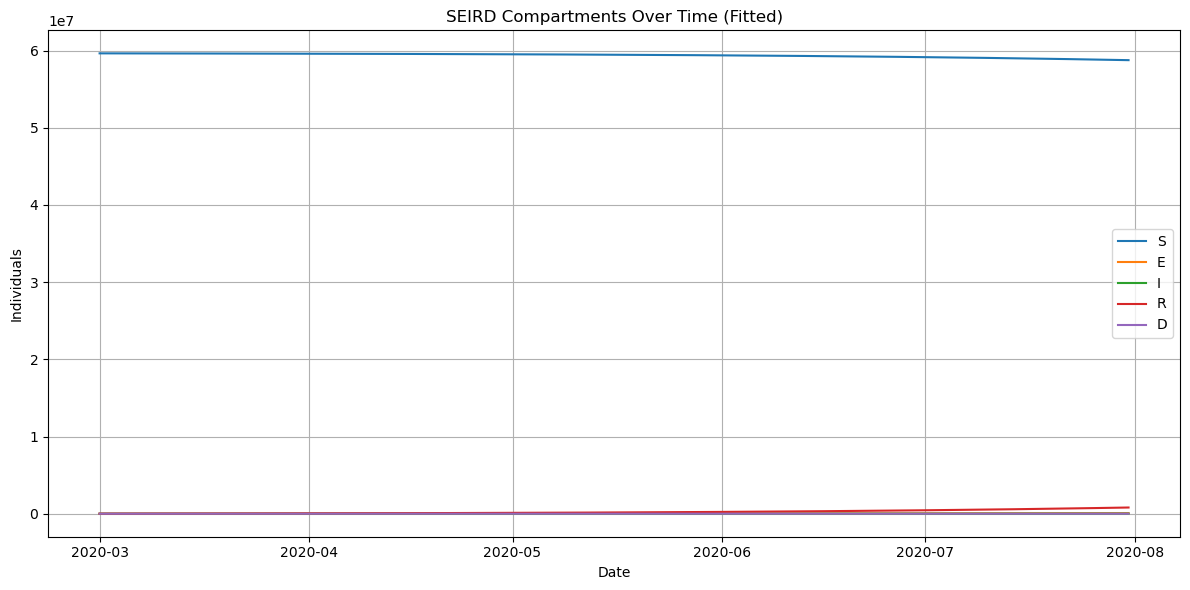

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Observed data (full dataset)
I_obs = data_sir['I_est'].values.astype(float)
dates = data_sir['date'].values
t = np.arange(len(I_obs), dtype=float)
N = float(population)

# Initial conditions 
S0 = float(data_sir['S_est'].iloc[0])
I0 = float(data_sir['I_est'].iloc[0])
R0 = float(data_sir['R_est'].iloc[0])

# Exposed
E0 = 2.0 * I0

# Death
D0 = 0.0

# extra parameters
mu = 0.002                 # death rate per day (given by you)
incubation_days = 5.0      # typical COVID incubation ~5 days
sigma = 1.0 / incubation_days

# SEIRD ODE system of eqations
def seird_rhs(t, y, beta, gamma):
    S, E, I, R, D = y
    # Infection uses total population as normalization
    dS = -beta * S * I / N
    dE =  beta * S * I / N - sigma * E
    dI =  sigma * E - gamma * I - mu * I
    dR =  gamma * I
    dD =  mu * I
    return [dS, dE, dI, dR, dD]

def simulate_seird(beta, gamma, t_eval):
    y0 = [S0, E0, I0, R0, D0]
    sol = solve_ivp(
        fun=lambda tt, yy: seird_rhs(tt, yy, beta, gamma),
        t_span=(t_eval[0], t_eval[-1]),
        y0=y0,
        t_eval=t_eval,
        method="RK45"
    )
    S, E, I, R, D = sol.y
    return S, E, I, R, D

# perform SSE
def sse_objective(params):
    beta, gamma = params

    # keeps optimizer in realistic region
    if beta < 0 or gamma < 0:
        return 1e30

    _, _, I_model, _, _ = simulate_seird(beta, gamma, t)
    # If solver ever returns nan/inf, penalize hard
    if not np.all(np.isfinite(I_model)):
        return 1e30

    return np.sum((I_model - I_obs) ** 2)

# Fitted beta, gamma on FULL data
x0 = np.array([2, 2])                 # initial guess
bounds = [(2, 4), (2, 4)]         # (beta, gamma) bounds

res = minimize(sse_objective, x0=x0, method="L-BFGS-B", bounds=bounds)
beta_fit, gamma_fit = res.x
final_sse = res.fun

print("SEIRD fit (full data)")
print("beta_fit =", beta_fit)
print("gamma_fit =", gamma_fit)
print("mu (fixed) =", mu)
print("sigma (fixed) =", sigma, f"(incubation_days={incubation_days})")
print("SSE =", final_sse)

# Simulate with fitted params + plot
S_fit, E_fit, I_fit, R_fit, D_fit = simulate_seird(beta_fit, gamma_fit, t)

plt.figure(figsize=(12, 6))
plt.plot(dates, I_fit, label="SEIRD model I(t) (RK45 fit)", linewidth=2)
plt.scatter(dates, I_obs, s=20, alpha=0.8, label="Observed I_est")
plt.xlabel("Date")
plt.ylabel("Infectious Population")
plt.title("SEIRD Fitted to Full Dataset vs Observed Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot each component
plt.figure(figsize=(12, 6))
plt.plot(dates, S_fit, label="S")
plt.plot(dates, E_fit, label="E")
plt.plot(dates, I_fit, label="I")
plt.plot(dates, R_fit, label="R")
plt.plot(dates, D_fit, label="D")
plt.xlabel("Date")
plt.ylabel("Individuals")
plt.title("SEIRD Compartments Over Time (Fitted)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper)).*

Our analysis showed that the RK4 method has less error than the Euler method and is better for predicting future infectious trends. This aligns with a paper by Workineh et. al, which compares Euler and RK4 methods for solving second-order IVPs of ODEs. While the RK4 method requires more computational power, it converges to the correct value in fewer iterations and with less error than the Euler method does.

However our R0 values however often fell slightly above 1 while a pooled meta-analysis across many studies estimated a mean R₀ of about 2.66 (95% CI ~2.41–2.94) in early outbreaks (Dhungel, et. al.), showing our models' inaccuracies. In addition according to D'Arienzo, et. al., a study fitting an SIR model to early Italian outbreak data (Feb–Mar 2020) reported R₀ values in the range 2.43–3.10.

D'Arienzo, M., & Coniglio, A. (2020). Assessment of the SARS-CoV-2 basic reproduction number, R0, based on the early phase of COVID-19 outbreak in Italy. Biosafety and health, 2(2), 57–59.

Dhungel, B., Rahman, M. S., Rahman, M. M., Bhandari, A. K. C., Le, P. M., Biva, N. A., & Gilmour, S. (2022). Reliability of Early Estimates of the Basic Reproduction Number of COVID-19: A Systematic Review and Meta-Analysis. International journal of environmental research and public health, 19(18), 11613. https://doi.org/10.3390/ijerph191811613

Workineh Y, Mekonnen H and Belew B (2024) Numerical methods for solving second-order initial value problems of ordinary differential equations with Euler and Runge-Kutta fourth-order methods. Front. Appl. Math. Stat. 10:1360628. doi: 10.3389/fams.2024.1360628

## Conclusions and Ethical Implications: 
We modeled the spread of COVID-19 in Italy using compartmental epidemic models, beginning with the classical SIR framework and extending it to a more realistic SEIR/SEIRD formulation. The SIR model was solved using both Euler’s method and a higher-order Runge–Kutta method (RK45). While both models were able to resemble the infectious data rates, neither were perfect predictors, particularly when only modeled on half the data. It is important to consider the ethical implications of the inaccuracies. Often the model showed infection subduing earlier than it really does which if used to guide public health policies could lead to looser policies and more unexpected infections. The models can be used to help understand our diseases and infection rates, but our current models should not be used as exact predictors, otherwise public health may be put at risk. There is an ethical responsibility to communicate uncertainty, not only of infection rates but recovery, death rates, and unknown lasting conditions. Presenting single “best-fit” values without uncertainty bounds can give a false sense of certainty, potentially undermining public trust. Policymakers and the public must understand that these models are simplified representations of complex human and biological systems, and their outputs should be interpreted alongside expert judgment, empirical evidence, and ethical considerations such as equity, proportionality, and societal impact.

## Limitations and Future Work: 
While the SIR and SEIR-style models we built help explain the general shape of COVID-19 spread in Italy, they have important limitations. As discussed in Bjørnstad et al.’s SEIRS framework and in Why Modeling the Spread of COVID-19 is So Damn Hard, real epidemics are influenced by many factors that simple compartmental models cannot fully capture. Even after adding an exposed compartment and a death rate, our model still simplifies complex processes like behavior changes, testing availability, and public health interventions.

One major issue is that model parameters are hard to pin down. Different values of the transmission and recovery rates can produce similar infection curves, which we saw when different fitting methods gave very different parameter estimates. This means a good numerical fit does not necessarily imply a biologically realistic model. In addition, the data we used is based on reported cases, which depend heavily on testing and reporting practices rather than true infection levels.

Another key limitation is that the model assumes everyone mixes uniformly in the population. In reality, contact patterns vary by age, region, and social behavior, and policies like lockdowns or mask mandates significantly change transmission over time. In addition, marginalized groups having different infection rates / susceptibility not being taken into account could create worse effects for their communities. Because our model does not explicitly include these effects, its ability to predict future trends is limited.

From an ethical standpoint, these limitations highlight why epidemic models should be used carefully. Even when a model fits past data well, it can still perform poorly when predicting future outcomes. Overconfidence in model predictions can mislead decision-makers and the public, so it is important to clearly communicate uncertainty and assumptions.

Future work could improve the model by including waning immunity (a full SEIRS model), time-varying transmission rates, or additional data sources such as hospitalizations or mobility data. Adding uncertainty estimates would also make the results more honest and useful for real-world decision-making.

Bjørnstad, O., Shea, K., Krzywinski, M., & Altman, N. (2020). The SEIRS model for infectious disease dynamics. Nature Methods, 17(6), 557-558.

## NOTES FROM YOUR TEAM: 
- end goal to create model with beta and gamma fitted from SIR
- separated S and IR plots to better see their patterns
- used scipy optimize least squares to fit beta and gamma parameters for fisrt model
- tried using optimize minimize, but that model did not fit at all
- used grid search instead to optimize parameters and that was significantly better
- split data so we could predict second half based on first half
    - 1st half data SSE greater than full data SSE
- did RK4 method
    - SSE for 1st half data and for 2nd half data lower than those using Euler method

- next steps:
    - validate data and finish writing up conclusions and such
- used SEIRD model
    - had to add incubation period and death rate

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*

- none as of now